In [284]:
import numpy as np

# ■ 기계가 직접 학습해서 가중치 (W) 와 바이어스(b) 를 알아 내겠금 하는 방법


## 예제1. 아래의 두 행렬을 생성하시오 !

In [285]:
#    x      w 
# -1 0 0   0.3
# -1 1 0   0.4
# -1 0 1   0.1
# -1 1 1 

In [286]:
x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
w = np.array([[0.3],[0.5],[0.1]])
print(x.shape)
print(w.shape)


(4, 3)
(3, 1)


In [287]:
x.ndim

2

In [288]:
w.ndim

2

## 예제2. 손으로 퍼셉트론을 구현해봅니다. 
아래 AND 게이트를 구현해 봅시다. 

In [289]:

#    x       target       w     
# x0 x1  x2       
# -1  0  0      0        0.3
# -1  1  0      0        0.4
# -1  0  1      0        0.1
# -1  1  1      1


<div>
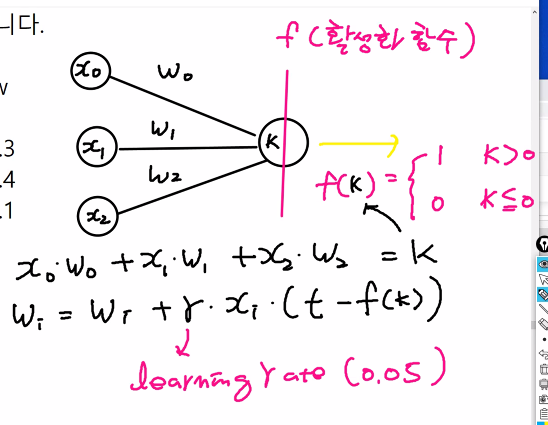
</div>

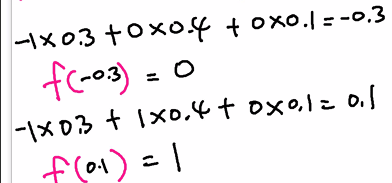

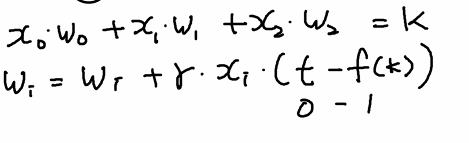

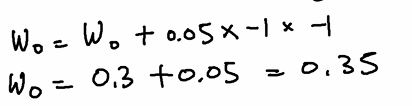

w_0 이 0.3 에서 0.35 로 바뀌었다. 

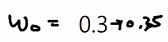

w_1 도 위와 같은 방식으로 w_1도 0.35로 바뀐다. 

W_1 = W_1(예전꺼) + 0.05(0-1)


w_i(신규) = w_i(예전) + r* x_i ( target - f(k) )


여기서 i 는 X 의 번호 이다. 

0.3 0.4 1 에서 아래와 같이 수정을 거친다. 

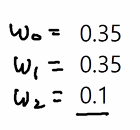

한번 수정을 거치면 이렇게 변한다.

In [290]:
# x_0*w_0 + x_1*w_1 + x_2*w_2  = k

# f(k) =  1 (k>0)
#         0 (k<=0)



# w_i(신규) = w_i(예전) + r* x_i ( target - f(k) )

## 문제27 . 어제 문제24번 AND 게이트 함수를 가져와서 위에서 구한 가중치와 바이어스를 대입해서 Target(정답) 을 잘 예측 하는지 테스트 하시오 ! 

In [291]:
# b = -0.35
# w1 = 0.35
# w2 = 0.1

In [292]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.35,0.1]) # 실제로는 이 w 와 b 를 컴퓨터(기계) 가 학습합니다. 
    b = -0.35
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else :
        return 1    

In [293]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

In [294]:
for i in X:
    print(AND(i[0],i[1]))

0
0
0
1


# and 게이트 데이터는 어떻게 분류가 되는것인가? 

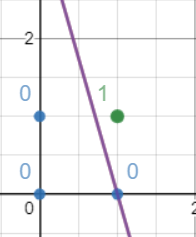


## 예제1. 행렬로 위의 값을 만들어 보시오.

In [295]:
x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
w = np.array([[0.3],[0.4],[0.1]])
target = np.array([[0],[0],[0],[1]])

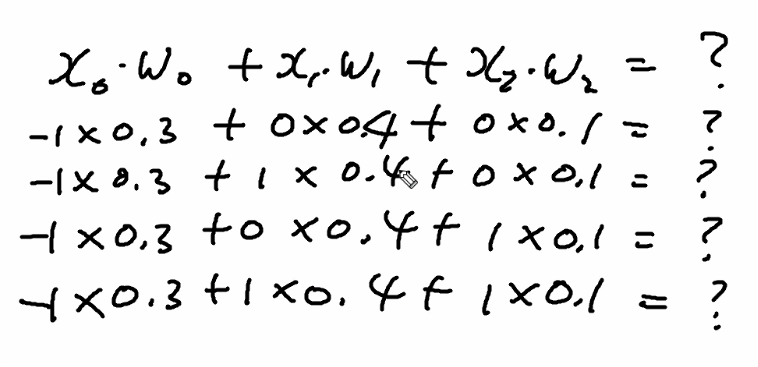

## 예제2 입력값과 가중치의 곱의 합을 구현하시오 !

In [296]:
print(w.T)
w.T.shape

[[0.3 0.4 0.1]]


(1, 3)

In [297]:
print(x*w.T)

[[-0.3  0.   0. ]
 [-0.3  0.4  0. ]
 [-0.3  0.   0.1]
 [-0.3  0.4  0.1]]


In [298]:
# 나중에 행렬로 구현해봥
# a = np.array([[1],[1],[1],[1]])


# x*w.T*a
# print((x*w.T*a))

In [299]:
k = x* w.T
print(k.sum(axis = 1 ))


[-0.3  0.1 -0.2  0.2]


## 예제3 입력값과 가중치의 곱의 합을 계산하는 predict 함수를 만드시오 

In [300]:
def predict(x,w):
    a = np.sum(x*w.T)
    return a

In [301]:
for i in range (len(x)):
    print (predict(x[i],w))

-0.3
0.10000000000000003
-0.19999999999999998
0.20000000000000004


## 예제4. 입력되는 값이 0 보다 작거나 같으면 0을 출력하고 입력되는 값이 0보다 크면 1을 출력하는 step_function 함수를 생성하시오. 

In [302]:
def step_function(x):
    if x > 0 :
        return 1
    else:
        return 0          

In [303]:
step_function(0.3)

1

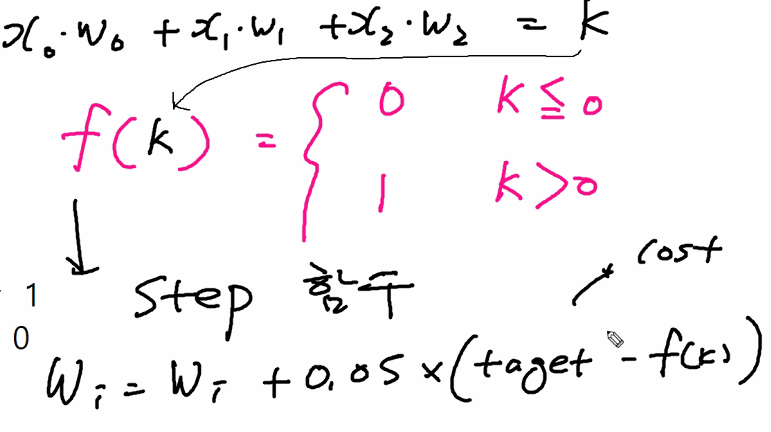

## 예제5. 위에서 출력한 k 값을 방금 만든 step_function 함수에 넣고 값을 출력하시오 !

In [304]:
def predict(x,w):
    a = np.sum(x*w.T)
    return a

In [305]:
def step_function(x):
    if x > 0 :
        return 1
    else:
        return 0          

In [306]:
 # 위의 두 함수를 합쳐서 하나로 만들면
    
def predict(x,w):
    a = np.sum(x*w.T)
    return step_function(a)

In [307]:
for i in range (len(x)):
    print (predict(x[i],w))

0
1
0
1


## 예제6. 위에서 만든 예측값과 target 값과의 차이를 구하시오 ! 

In [308]:
target

array([[0],
       [0],
       [0],
       [1]])

In [309]:
for i in range (len(x)):
    print (target[i]-predict(x[i],w))

[0]
[-1]
[0]
[0]


In [310]:
for i in range (len(x)):
    cost =  (target[i]-predict(x[i],w))

## 예제7. 위의 cost가 0이 아니면 cost를 출력하시오 !

In [311]:
def is_0(x):
    if x != 0:
        return x
    else:
        pass    

In [312]:
for i in range (len(x)):
    cost =  (target[i]-predict(x[i],w))
    print(is_0(cost))

None
[-1]
None
None


## 예제8. cost가 0이 아닐때는 가중치가 갱신될수 있게 하시오 ! 

In [313]:
x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
w = np.array([[0.3],[0.4],[0.1]])
target = np.array([[0],[0],[0],[1]])

In [314]:
for i in range( len(x)):
    cost = target[i] - predict(x[i],w)
    if cost != 0:
        w = w + np.array([0.05* x[i]*cost]).T
    print(w)

[[0.3]
 [0.4]
 [0.1]]
[[0.35]
 [0.35]
 [0.1 ]]
[[0.35]
 [0.35]
 [0.1 ]]
[[0.35]
 [0.35]
 [0.1 ]]


## 문제28. (점심시간문제) 위의 코드를 수정해서 맨 마지막에 갱신된 w 값만 출력되게 하시오.

In [315]:
x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
w = np.array([[0.3],[0.4],[0.1]])
target = np.array([[0],[0],[0],[1]])

In [316]:

for i in range( len(x)):
    cost = target[i] - predict(x[i],w)
    w = w + np.array([0.05* x[i]*cost]).T
    print(w)

[[0.3]
 [0.4]
 [0.1]]
[[0.35]
 [0.35]
 [0.1 ]]
[[0.35]
 [0.35]
 [0.1 ]]
[[0.35]
 [0.35]
 [0.1 ]]


In [317]:

for i in range( len(x)):
    cost = target[i] - predict(x[i],w)
    w = w + np.array([0.05* x[i]*cost]).T
    print(w)

[[0.35]
 [0.35]
 [0.1 ]]
[[0.4]
 [0.3]
 [0.1]]
[[0.4]
 [0.3]
 [0.1]]
[[0.4]
 [0.3]
 [0.1]]


## 문제29. 비용이 0이 되고 더이상 비용이 발생하기 않았을때의 가중치가 출력되게 하시오 !

In [344]:
x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
w = np.array([[0.7],[0.4],[0.1]])
target = np.array([[0],[0],[0],[1]])


for j in range(5):
    sum1 = 0   # sum1에는 4개의 데이터를 입력할때 발생하는 비용(에러)가 입력될 변수 
    for i in range( len(x)):
        cost = target[i]-predict(x[i],w)

        8520if cost != 0:
            w = w + np.array([0.05* x[i]*cost]).T
        elif cost==0:
            continue
        sum1 += cost # sum1 에 4개의 입력데이터를 사용했을때 발생하는 비용을 입력한다. 
    print(sum1, w.T) # 보기 편하게 하려고 w를 전치시킴
    
    
    

[1] [[0.65 0.45 0.15]]
[1] [[0.6 0.5 0.2]]
0 [[0.6 0.5 0.2]]
0 [[0.6 0.5 0.2]]
0 [[0.6 0.5 0.2]]


## 문제30. 위의  코드에서 비용(cost)가 0이 되는 시점에 break 해서 loop 문을 종료하고 변경된 최종 가중치가 출력되게 하시오 !

In [365]:
x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
w = np.array([[0.7],[0.4],[0.1]])
target = np.array([[0],[0],[0],[1]])


for j in range(5):
    sum1 = 0   # sum1에는 4개의 데이터를 입력할때 발생하는 비용(에러)가 입력될 변수 
    for i in range( len(x)):
        cost = target[i]-predict(x[i],w)
        if cost != 0:
            w = w + np.array([0.05* x[i]*cost]).T
        elif cost==0:
            continue
        sum1 += abs(cost)
    if sum1 == 0:
        break
print(sum1, w.T) 
    

0 [[0.6 0.5 0.2]]


 ## 문제31. 무한 루프문으로 변경하시오.

In [366]:
x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
w = np.array([[0.7],[0.4],[0.1]])
target = np.array([[0],[0],[0],[1]])


while True:
    sum1 = 0   # sum1에는 4개의 데이터를 입력할때 발생하는 비용(에러)가 입력될 변수 
    for i in range( len(x)):
        cost = target[i]-predict(x[i],w)
        if cost != 0:
            w = w + np.array([0.05* x[i]*cost]).T
        elif cost==0:
            continue
        sum1 += abs(cost)
    if sum1 == 0:
        break
print(sum1, w.T) 

0 [[0.6 0.5 0.2]]


## 문제 32. 위의 코드를 아래와 같이 수행되면 실행되겠금 함수로 생성하시오 ! ( 함수이름 : perceptron_1957 )

In [371]:
x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
w = np.array([[0.7],[0.4],[0.1]])
target = np.array([[0],[0],[0],[1]])

def perceptron_1957(x,w,target):
    while True:
        sum1 = 0   # sum1에는 4개의 데이터를 입력할때 발생하는 비용(에러)가 입력될 변수 
        for i in range( len(x)):
            cost = target[i]-predict(x[i],w)
            if cost != 0:
                w = w + np.array([0.05* x[i]*cost]).T
            elif cost==0:
                continue
            sum1 += abs(cost)
        if sum1 == 0:
            break
    return ('가중치', w.T)

print(perceptron_1957(x,w,target))

('가중치', array([[0.6, 0.5, 0.2]]))


In [375]:
x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
w = np.array([[0.7],[0.4],[0.1]])
target = np.array([[0],[0],[0],[1]])

def perceptron_1957(x,w,target):
    while True:
        sum1 = 0   # sum1에는 4개의 데이터를 입력할때 발생하는 비용(에러)가 입력될 변수 
        for i in range( len(x)):
            cost = target[i]-predict(x[i],w)
            w = w + np.array([0.05* x[i]*cost]).T
            sum1 += abs(cost)
        if sum1 == 0:
            break
    return ('가중치', w.T)

print(perceptron_1957(x,w,target))

('가중치', array([[0.6, 0.5, 0.2]]))


## 문제33. OR 게이트를 구현해 보시오. 

In [374]:
x = np.array([[-1,0,0],[-1,1,0],[-1,0,1],[-1,1,1]])
w = np.array([[0.7],[0.4],[0.1]])
target = np.array([[0],[0],[0],[1]]) # 타겟값을 바꿔준다.
target = np.array([[0],[1],[1],[1]])

def perceptron_1957(x,w,target):
    while True:
        sum1 = 0   # sum1에는 4개의 데이터를 입력할때 발생하는 비용(에러)가 입력될 변수 
        for i in range( len(x)):
            cost = target[i]-predict(x[i],w)
            w = w + np.array([0.05* x[i]*cost]).T
            sum1 += abs(cost)
        if sum1 == 0:
            break
    return ('가중치', w.T)

print(perceptron_1957(x,w,target))

('가중치', array([[0.35, 0.5 , 0.35]]))


# 2장 요약 정리

1. 퍼셉트론 ? 인간의 뇌의 뉴런 세포를 컴퓨터로 흉내낸것

2. 퍼셉트론의 종류 ? 
    > a. 단층 퍼셉트론: and, or, nand 게이트
    > b. 다층 퍼셉트론 : Xor 게이트
 
3. 인공 신경망에 최종적으로 산출해야할 값? 파라미터 ( 가중치와 바이어스 )
